# Capstone Project: The Battle of The Neighborhoods
by: Nickolas Black

## Introduction: Business Problem

This project analyzes the most recently published NYC Citi Bike data. The goal is to find the neighborhoods that Citi Bikes are most often used, the average age of current citi bike users, the top 10 venues in the neighborhoods with the most citi bike traffic, and to cluster the neighborhoods using k-means clustering.

This project is designed to target bicycle enthusiasts who are looking to relocate to NYC and bicycle businesses that are looking for venues to advertise their products and services. The descriptive charateristics of the individual user data will provide advertisers with an idea of a targeted demographic for advertisements. The location data will provide bike users with an idea of which neighborhoods bikes are more or less readily available and where they can connect and network with fellow biking enthusiasts.

We will focus on the neighborhoods with the highest number of bicycle traffic, a description of the people who use the bike sharing program, and the top 10 venues in the neighborhoods with the most traffic. 



## Data

Based on our description of the problem, factors that will influence our decisions are:

* The most commonly used Citi Bike Terminals.
* The average age of Citi Bike users.
* The most common venues in the areas with the most Citi Bike traffic.

The following sources will be needed to generate a solution to the given business problem:

* [Part 1: Creating a Data Frame containing real world data of recent Citi Bike usage from NYC Open Data](https://www.citibikenyc.com/system-data): A dataset consisting of CitiBike meta data containing: 
    Trip Duration (seconds),
    Start Time and Date,
    Stop Time and Date,
    Start Station Name,
    End Station Name,
    Station ID,
    Station Lat/Long,
    Bike ID,
    User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member),
    Gender (Zero=unknown; 1=male; 2=female),
    and Year of Birth.
* Part 2: Creating a new data frame of the neighborhoods with the most Citi bike usage, their coordinates, and the 10 ten venues using the foursquare API. 

## Methodology

In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
print("Libraries Installed")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    ------------------------------------------------------------
                       

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ac47f8b37455473b813da7d2e0873edd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5Xa81fnOQPPTUHsmI6zv95tN-nSb9fberJQb7CepIcvC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ac47f8b37455473b813da7d2e0873edd.get_object(Bucket='nyccitibikedataproject-donotdelete-pr-udhwgdkhv7logr',Key='JC-202004-citibike-tripdata.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

citibike = pd.read_csv(body)
citibike.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1437,2020-04-01 01:06:20.6300,2020-04-01 01:30:17.9680,3678,Fairmount Ave,40.725726,-74.071959,3678,Fairmount Ave,40.725726,-74.071959,42314,Customer,2002,2
1,264,2020-04-01 05:02:42.0570,2020-04-01 05:07:06.1260,3207,Oakland Ave,40.737604,-74.052478,3195,Sip Ave,40.730897,-74.063913,42146,Subscriber,1963,2
2,254,2020-04-01 06:20:28.1190,2020-04-01 06:24:42.1380,3678,Fairmount Ave,40.725726,-74.071959,3195,Sip Ave,40.730897,-74.063913,42255,Subscriber,1981,1
3,429,2020-04-01 06:33:30.5170,2020-04-01 06:40:40.1990,3195,Sip Ave,40.730897,-74.063913,3679,Bergen Ave,40.722104,-74.071455,42529,Subscriber,1964,1
4,805,2020-04-01 06:38:32.9220,2020-04-01 06:51:58.2050,3193,Lincoln Park,40.724605,-74.078406,3195,Sip Ave,40.730897,-74.063913,42362,Subscriber,1965,1


In [3]:
citibike.info

<bound method DataFrame.info of       tripduration                 starttime                  stoptime  \
0             1437  2020-04-01 01:06:20.6300  2020-04-01 01:30:17.9680   
1              264  2020-04-01 05:02:42.0570  2020-04-01 05:07:06.1260   
2              254  2020-04-01 06:20:28.1190  2020-04-01 06:24:42.1380   
3              429  2020-04-01 06:33:30.5170  2020-04-01 06:40:40.1990   
4              805  2020-04-01 06:38:32.9220  2020-04-01 06:51:58.2050   
5              317  2020-04-01 06:43:44.5300  2020-04-01 06:49:01.8340   
6              238  2020-04-01 06:43:52.2160  2020-04-01 06:47:51.0450   
7              360  2020-04-01 06:51:07.8450  2020-04-01 06:57:08.3370   
8               79  2020-04-01 07:00:01.6820  2020-04-01 07:01:21.3910   
9              523  2020-04-01 07:00:59.1390  2020-04-01 07:09:42.2690   
10            2118  2020-04-01 07:03:01.2760  2020-04-01 07:38:19.6040   
11             283  2020-04-01 07:08:35.3760  2020-04-01 07:13:18.9540   
12    

In [4]:
citibike.columns.values

array(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'birth year', 'gender'], dtype=object)

In [5]:
citibike.index.values

array([   0,    1,    2, ..., 9265, 9266, 9267])

In [6]:
citibike.columns.tolist()
citibike.index.tolist()
citibike.shape

(9268, 15)

In [7]:
citibike.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,9268.000000,9268.000000,9268.000000,9268.000000,9268.000000,9268.000000,9268.000000,9268.000000,9268.00000,9268.000000
mean,1803.697885,3311.715796,40.722889,-74.047607,3310.644152,40.722583,-74.047348,41840.916487,1979.39167,1.091174
std,14163.286205,187.385051,0.007638,0.012639,186.587133,0.007613,0.012567,2755.454525,11.54151,0.612974
min,63.000000,3184.000000,40.711130,-74.083639,3184.000000,40.711130,-74.083639,15363.000000,1949.00000,0.000000
25%,380.000000,3196.000000,40.716870,-74.055701,3195.000000,40.716870,-74.052478,42196.750000,1969.00000,1.000000
50%,820.500000,3211.000000,40.721651,-74.044247,3211.000000,40.721525,-74.044247,42336.000000,1981.00000,1.000000
75%,1729.250000,3278.000000,40.727596,-74.037683,3277.000000,40.727596,-74.038051,42470.000000,1989.00000,1.000000
max,846382.000000,3792.000000,40.748716,-74.032108,3792.000000,40.810000,-73.955151,42636.000000,2002.00000,2.000000


In [8]:
citibike.drop(['bikeid'], axis=1, inplace=True)
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,usertype,birth year,gender
0,1437,2020-04-01 01:06:20.6300,2020-04-01 01:30:17.9680,3678,Fairmount Ave,40.725726,-74.071959,3678,Fairmount Ave,40.725726,-74.071959,Customer,2002,2
1,264,2020-04-01 05:02:42.0570,2020-04-01 05:07:06.1260,3207,Oakland Ave,40.737604,-74.052478,3195,Sip Ave,40.730897,-74.063913,Subscriber,1963,2
2,254,2020-04-01 06:20:28.1190,2020-04-01 06:24:42.1380,3678,Fairmount Ave,40.725726,-74.071959,3195,Sip Ave,40.730897,-74.063913,Subscriber,1981,1
3,429,2020-04-01 06:33:30.5170,2020-04-01 06:40:40.1990,3195,Sip Ave,40.730897,-74.063913,3679,Bergen Ave,40.722104,-74.071455,Subscriber,1964,1
4,805,2020-04-01 06:38:32.9220,2020-04-01 06:51:58.2050,3193,Lincoln Park,40.724605,-74.078406,3195,Sip Ave,40.730897,-74.063913,Subscriber,1965,1


In [9]:
num = citibike['birth year'].value_counts()
num.sort_index(axis=0)
num.head()

1969    1403
1989     443
1987     419
1986     406
1988     394
Name: birth year, dtype: int64

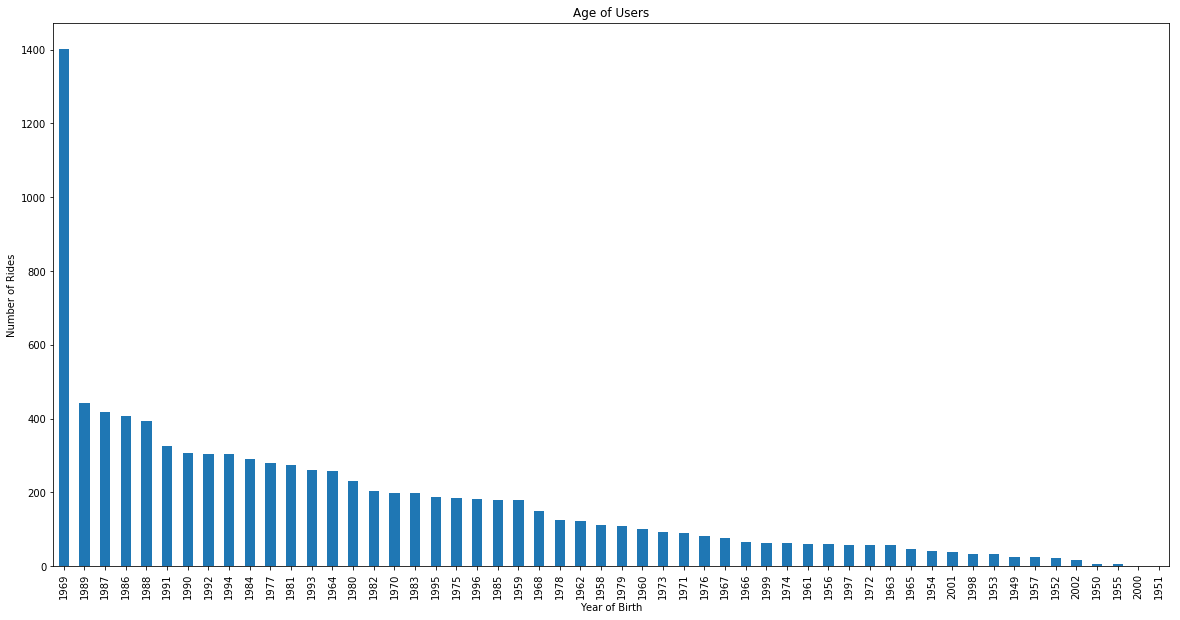

In [10]:
num.plot(kind='bar', figsize=(20,10))
plt.title('Age of Users')
plt.ylabel('Number of Rides')
plt.xlabel('Year of Birth')
plt.show()

In [30]:
female = pd.DataFrame(citibike, columns = ['end station name', 'gender' ])

In [31]:
female = female[female['gender'] != 0].reset_index(drop=True)

In [32]:
female = female[female['gender'] != 1].reset_index(drop=True)

In [33]:
female.head()

,end station name,gender
0,Fairmount Ave,2
1,Sip Ave,2
2,Grove St PATH,2
3,Sip Ave,2
4,JC Medical Center,2


In [35]:
female['end station name'].value_counts()

Newport Pkwy                  201
Harborside                    110
Liberty Light Rail             93
Hamilton Park                  91
Grove St PATH                  89
Sip Ave                        84
Morris Canal                   82
Newport PATH                   77
JC Medical Center              77
Columbus Drive                 71
Montgomery St                  70
Washington St                  68
Paulus Hook                    65
City Hall                      65
Marin Light Rail               63
Van Vorst Park                 57
Columbus Dr at Exchange Pl     53
McGinley Square                48
Brunswick & 6th                46
Newark Ave                     45
Bergen Ave                     44
Warren St                      41
Monmouth and 6th               38
Brunswick St                   34
Hoboken Ave at Monmouth St     33
York St                        32
Dixon Mills                    31
Manila & 1st                   30
Jersey & 6th St                27
Baldwin at Mon

In [11]:
gender = pd.DataFrame(citibike, columns=['gender'])
gender.head()

,gender
0,2
1,2
2,1
3,1
4,1


In [12]:
gender = gender[gender['gender'] != 0].reset_index(drop=True)
gender.head()

,gender
0,2
1,2
2,1
3,1
4,1


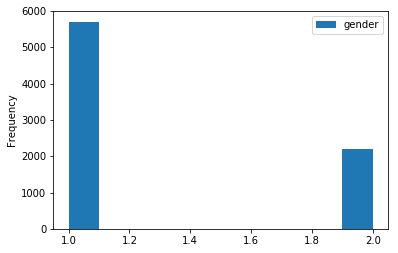

In [13]:
gender.plot.hist()

In [14]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files





In [15]:


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [18]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0           conda-forge
    geopy:         1.22.0-pyh9f0ad1d_0 conda-forge


geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-1.22.0         | 63 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [19]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [20]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [21]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [22]:
neighborhoods_data = newyork_data['features']

In [23]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [24]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [25]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [26]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [27]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [28]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [29]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [30]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [31]:
CLIENT_ID = 'IDNGKJRERTGKP5XNCQOK5WHOMQTX4S0KBLT00ML3IOJCKVKG' # your Foursquare ID
CLIENT_SECRET = 'JYYPKFBUOOHSC5UEJ1O3TLWOXYAUQQNKBMUXDH3JEJKUGFSD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IDNGKJRERTGKP5XNCQOK5WHOMQTX4S0KBLT00ML3IOJCKVKG
CLIENT_SECRET:JYYPKFBUOOHSC5UEJ1O3TLWOXYAUQQNKBMUXDH3JEJKUGFSD


In [32]:
cl_names = ['Station Name', 'Station Id', 'Latitude', 'Longitude']

start = pd.DataFrame(columns = cl_names)

In [33]:
start['Station Name'] = citibike['start station name']
start['Latitude'] = citibike['start station latitude']
start['Longitude'] = citibike['start station longitude']
start['Station Id'] = citibike['start station id']

In [34]:
start.head()

,Station Name,Station Id,Latitude,Longitude
0,Fairmount Ave,3678,40.725726,-74.071959
1,Oakland Ave,3207,40.737604,-74.052478
2,Fairmount Ave,3678,40.725726,-74.071959
3,Sip Ave,3195,40.730897,-74.063913
4,Lincoln Park,3193,40.724605,-74.078406


In [35]:
end = pd.DataFrame(columns = cl_names)

end

,Station Name,Station Id,Latitude,Longitude


In [36]:
end['Station Name'] = citibike['end station name']
end['Station Id'] = citibike['end station id']
end['Latitude'] = citibike['end station latitude']
end['Longitude'] = citibike['end station longitude']

In [37]:
end.head()

,Station Name,Station Id,Latitude,Longitude
0,Fairmount Ave,3678,40.725726,-74.071959
1,Sip Ave,3195,40.730897,-74.063913
2,Sip Ave,3195,40.730897,-74.063913
3,Bergen Ave,3679,40.722104,-74.071455
4,Sip Ave,3195,40.730897,-74.063913


In [38]:
end.shape

(9268, 4)

In [39]:
start.describe()

,Station Id,Latitude,Longitude
count,9268.000000,9268.000000,9268.000000
mean,3311.715796,40.722889,-74.047607
std,187.385051,0.007638,0.012639
min,3184.000000,40.711130,-74.083639
25%,3196.000000,40.716870,-74.055701
50%,3211.000000,40.721651,-74.044247
75%,3278.000000,40.727596,-74.037683
max,3792.000000,40.748716,-74.032108


In [40]:
start['Station Name'].value_counts()

Newport Pkwy                  682
Sip Ave                       525
Marin Light Rail              416
Harborside                    370
Hamilton Park                 348
Liberty Light Rail            347
Grove St PATH                 328
Morris Canal                  322
Paulus Hook                   277
Newport PATH                  263
JC Medical Center             258
Washington St                 248
Columbus Drive                244
Columbus Dr at Exchange Pl    240
Warren St                     239
Bergen Ave                    231
City Hall                     225
Van Vorst Park                217
McGinley Square               214
Newark Ave                    205
Montgomery St                 176
Baldwin at Montgomery         172
Pershing Field                159
Hoboken Ave at Monmouth St    147
Monmouth and 6th              147
Hilltop                       136
Essex Light Rail              128
Brunswick & 6th               125
Fairmount Ave                 124
Dixon Mills   

In [41]:
end['Station Name'].value_counts()

Newport Pkwy                  663
Sip Ave                       479
Grove St PATH                 424
Marin Light Rail              404
Hamilton Park                 367
Liberty Light Rail            360
Harborside                    353
Morris Canal                  337
Paulus Hook                   277
Newport PATH                  261
JC Medical Center             254
Columbus Dr at Exchange Pl    246
City Hall                     245
Washington St                 242
Warren St                     240
Columbus Drive                235
Bergen Ave                    227
Van Vorst Park                225
Newark Ave                    220
Montgomery St                 188
McGinley Square               175
Baldwin at Montgomery         162
Pershing Field                152
Hoboken Ave at Monmouth St    144
Monmouth and 6th              135
Brunswick & 6th               134
Essex Light Rail              133
Grand St                      127
Manila & 1st                  124
Fairmount Ave 

In [42]:
citi_stations = pd.merge(start, end, on = 'Station Name', how = 'left')
citi_stations.head()

,Station Name,Station Id_x,Latitude_x,Longitude_x,Station Id_y,Latitude_y,Longitude_y
0,Fairmount Ave,3678,40.725726,-74.071959,3678,40.725726,-74.071959
1,Fairmount Ave,3678,40.725726,-74.071959,3678,40.725726,-74.071959
2,Fairmount Ave,3678,40.725726,-74.071959,3678,40.725726,-74.071959
3,Fairmount Ave,3678,40.725726,-74.071959,3678,40.725726,-74.071959
4,Fairmount Ave,3678,40.725726,-74.071959,3678,40.725726,-74.071959


In [43]:
citi_stations.shape

(2535070, 7)

In [44]:
citi_stations.columns.values

array(['Station Name', 'Station Id_x', 'Latitude_x', 'Longitude_x',
       'Station Id_y', 'Latitude_y', 'Longitude_y'], dtype=object)

In [45]:
citi_stations.drop([ 'Latitude_y', 'Longitude_y'], axis=1,  inplace=True)

In [46]:
citi_stations.head()

,Station Name,Station Id_x,Latitude_x,Longitude_x,Station Id_y
0,Fairmount Ave,3678,40.725726,-74.071959,3678
1,Fairmount Ave,3678,40.725726,-74.071959,3678
2,Fairmount Ave,3678,40.725726,-74.071959,3678
3,Fairmount Ave,3678,40.725726,-74.071959,3678
4,Fairmount Ave,3678,40.725726,-74.071959,3678


In [47]:
citi_stations.tail()

,Station Name,Station Id_x,Latitude_x,Longitude_x,Station Id_y
2535065,Union St,3191,40.718211,-74.083639,3191
2535066,Union St,3191,40.718211,-74.083639,3191
2535067,Union St,3191,40.718211,-74.083639,3191
2535068,Union St,3191,40.718211,-74.083639,3191
2535069,Union St,3191,40.718211,-74.083639,3191


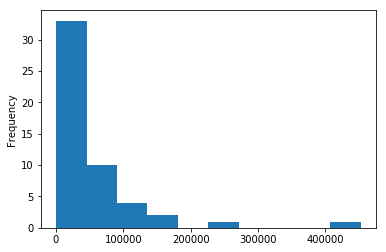

In [48]:
citi_stations['Station Name'].value_counts().plot.hist()

In [49]:
geo_data = citi_stations.drop_duplicates()
geo_data

,Station Name,Station Id_x,Latitude_x,Longitude_x,Station Id_y
0,Fairmount Ave,3678,40.725726,-74.071959,3678
121,Oakland Ave,3207,40.737604,-74.052478,3207
308,Sip Ave,3195,40.730897,-74.063913,3195
787,Lincoln Park,3193,40.724605,-74.078406,3193
892,Newark Ave,3211,40.721525,-74.046305,3211
1112,Morris Canal,3267,40.712419,-74.038526,3267
1735,Paulus Hook,3184,40.714145,-74.033552,3184
2349,Hamilton Park,3203,40.727596,-74.044247,3203
3195,Monmouth and 6th,3278,40.725685,-74.048790,3278
3809,Bergen Ave,3679,40.722104,-74.071455,3679


In [50]:
geo_data.iloc[25]

Station Name    Newport Pkwy
Station Id_x            3199
Latitude_x           40.7287
Longitude_x         -74.0321
Station Id_y            3199
Name: 10712, dtype: object

In [51]:
geo_data.set_index("Station Name")

,Station Id_x,Latitude_x,Longitude_x,Station Id_y
Station Name,,,,
Fairmount Ave,3678,40.725726,-74.071959,3678
Oakland Ave,3207,40.737604,-74.052478,3207
Sip Ave,3195,40.730897,-74.063913,3195
Lincoln Park,3193,40.724605,-74.078406,3193
Newark Ave,3211,40.721525,-74.046305,3211
Morris Canal,3267,40.712419,-74.038526,3267
Paulus Hook,3184,40.714145,-74.033552,3184
Hamilton Park,3203,40.727596,-74.044247,3203
Monmouth and 6th,3278,40.725685,-74.048790,3278


In [52]:
geo_data = geo_data.rename(columns = {'Latitude_x' : 'Latitude'})

In [53]:
geo_data = geo_data.rename(columns = {'Longitude_x' : 'Longitude'})
geo_data.head()

,Station Name,Station Id_x,Latitude,Longitude,Station Id_y
0,Fairmount Ave,3678,40.725726,-74.071959,3678
121,Oakland Ave,3207,40.737604,-74.052478,3207
308,Sip Ave,3195,40.730897,-74.063913,3195
787,Lincoln Park,3193,40.724605,-74.078406,3193
892,Newark Ave,3211,40.721525,-74.046305,3211


In [54]:
newport = pd.DataFrame(geo_data.iloc[25])
newport

,10712
Station Name,Newport Pkwy
Station Id_x,3199
Latitude,40.7287
Longitude,-74.0321
Station Id_y,3199


In [55]:
newport.transpose()

,Station Name,Station Id_x,Latitude,Longitude,Station Id_y
10712,Newport Pkwy,3199,40.7287,-74.0321,3199


In [56]:
newport.columns.values

array([10712])

In [107]:
neighborhood_latitude = geo_data.loc[11375, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = geo_data.loc[11375, 'Longitude'] # neighborhood longitude value

neighborhood_name = geo_data.loc[11375, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Grove St PATH are 40.71958611647166, -74.0431174635887.


In [108]:

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius



# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=IDNGKJRERTGKP5XNCQOK5WHOMQTX4S0KBLT00ML3IOJCKVKG&client_secret=JYYPKFBUOOHSC5UEJ1O3TLWOXYAUQQNKBMUXDH3JEJKUGFSD&v=20180605&ll=40.71958611647166,-74.0431174635887&radius=500&limit=100'

In [109]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee282edd72a4a1a200dfa8c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Harsimus',
  'headerFullLocation': 'Harsimus, Jersey City',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 96,
  'suggestedBounds': {'ne': {'lat': 40.72408612097166,
    'lng': -74.0371911737715},
   'sw': {'lat': 40.71508611197166, 'lng': -74.0490437534059}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '589499deba883735f3add663',
       'name': 'Krispy Kreme Doughnut',
       'location': {'address': '95 Christopher Columbus Dr',
        'lat': 40.7187648,
        'lng': -74.0417623,
        'labeledLatLngs': [

In [110]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [111]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(15)

,name,categories,lat,lng
0,Krispy Kreme Doughnut,Donut Shop,40.718765,-74.041762
1,Lackawanna Coffee,Coffee Shop,40.718501,-74.043571
2,L'Atelier Du Chocolat,Chocolate Shop,40.719766,-74.041235
3,Taqueria Downtown Catering Co.,Mexican Restaurant,40.720976,-74.042658
4,Latham House,New American Restaurant,40.718701,-74.041798
5,CrossFit Jersey City,Gym,40.719524,-74.043834
6,Grove Street Farmers' Market,Farmers Market,40.719764,-74.042622
7,WORD Jersey City,Bookstore,40.719984,-74.043205
8,Broa,Portuguese Restaurant,40.718589,-74.043527
9,Newark Avenue Pedestrian Plaza,Plaza,40.720729,-74.044363


In [63]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

26 venues were returned by Foursquare.


In [64]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [65]:
citi_venues = getNearbyVenues(names=geo_data['Station Name'],
                                   latitudes=geo_data['Latitude'],
                                   longitudes=geo_data['Longitude']
                                  )

Fairmount Ave
Oakland Ave
Sip Ave
Lincoln Park
Newark Ave
Morris Canal
Paulus Hook
Hamilton Park
Monmouth and 6th
Bergen Ave
Pershing Field
Harborside
City Hall
Glenwood Ave
Hilltop
Marin Light Rail
Christ Hospital
Jackson Square
Van Vorst Park
Liberty Light Rail
Essex Light Rail
Jersey & 6th St
Grand St
York St
Union St
Newport Pkwy
Grove St PATH
Baldwin at Montgomery
Hoboken Ave at Monmouth St
Lafayette Park
Brunswick & 6th
Columbus Dr at Exchange Pl
JC Medical Center
Warren St
Dey St
Columbus Drive
Dixon Mills
Manila & 1st
Jersey & 3rd
Brunswick St
Montgomery St
McGinley Square
Newport PATH
Washington St
Riverview Park
Astor Place
Heights Elevator
Journal Square
Leonard Gordon Park
5 Corners Library
Communipaw & Berry Lane


In [66]:
print(citi_venues.shape)
citi_venues.head()

(2209, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Fairmount Ave,40.725726,-74.071959,Wonder Bagels,40.725330,-74.069394,Bagel Shop
1,Fairmount Ave,40.725726,-74.071959,Honey Bakery and Kitchen,40.723346,-74.070577,Café
2,Fairmount Ave,40.725726,-74.071959,McGinley Square Pub,40.725341,-74.069367,Bar
3,Fairmount Ave,40.725726,-74.071959,Crema Jc,40.723860,-74.070426,Coffee Shop
4,Fairmount Ave,40.725726,-74.071959,Our Hero,40.726197,-74.067568,American Restaurant


In [67]:
citi_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
5 Corners Library,39,39,39,39,39,39
Astor Place,12,12,12,12,12,12
Baldwin at Montgomery,27,27,27,27,27,27
Bergen Ave,19,19,19,19,19,19
Brunswick & 6th,43,43,43,43,43,43
Brunswick St,55,55,55,55,55,55
Christ Hospital,12,12,12,12,12,12
City Hall,87,87,87,87,87,87
Columbus Dr at Exchange Pl,43,43,43,43,43,43


In [68]:
print('There are {} uniques categories.'.format(len(citi_venues['Venue Category'].unique())))

There are 175 uniques categories.


In [69]:
# one hot encoding
citi_onehot = pd.get_dummies(citi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
citi_onehot['Neighborhood'] = citi_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [citi_onehot.columns[-1]] + list(citi_onehot.columns[:-1])
citi_onehot = citi_onehot[fixed_columns]

citi_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Art Gallery,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,Colombian Restaurant,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Music Store,New American Restaurant,Noodle House,North Indian Restaurant,Office,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Skating Rink,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,State / Provincial Park,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Toll Plaza,Toy / Game Store,Trade School,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Yoga Studio
0,Fairmount Ave,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fairmount Ave,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fairmount Ave,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fairmount Ave,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [70]:
citi_onehot.shape

(2209, 176)

In [71]:
citi_grouped = citi_onehot.groupby('Neighborhood').mean().reset_index()
citi_grouped

,Neighborhood,Afghan Restaurant,American Restaurant,Art Gallery,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,Colombian Restaurant,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Music Store,New American Restaurant,Noodle House,North Indian Restaurant,Office,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Skating Rink,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,State / Provincial Park,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Toll Plaza,Toy / Game Store,Trade School,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Yoga Studio
0,5 Corners Library,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.051282,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.051282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.051282,0.025641,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051282,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.025641,0.000000,0.000000,0.025641,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [72]:
citi_grouped.shape

(51, 176)

In [73]:
num_top_venues = 5

for hood in citi_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = citi_grouped[citi_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----5 Corners Library----
                  venue  freq
0     Indian Restaurant  0.33
1                  Café  0.05
2                Bakery  0.05
3          Dance Studio  0.05
4  Fast Food Restaurant  0.05


----Astor Place----
                  venue  freq
0  Fast Food Restaurant  0.17
1                  Café  0.17
2            Restaurant  0.08
3           Supermarket  0.08
4        Sandwich Place  0.08


----Baldwin at Montgomery----
                venue  freq
0                 Bar  0.07
1                 Gym  0.07
2      Sandwich Place  0.07
3  Chinese Restaurant  0.07
4  Italian Restaurant  0.07


----Bergen Ave----
                venue  freq
0  Italian Restaurant  0.11
1      Sandwich Place  0.11
2                 Bar  0.11
3                Café  0.11
4         Supermarket  0.05


----Brunswick & 6th----
                venue  freq
0              Bakery  0.09
1                 Bar  0.07
2       Deli / Bodega  0.05
3  Italian Restaurant  0.05
4         Pizza Place  0.05


----Bru

                 venue  freq
0           Food Truck  0.07
1  American Restaurant  0.07
2                 Café  0.05
3         Liquor Store  0.05
4          Coffee Shop  0.05


----Pershing Field----
                       venue  freq
0         Italian Restaurant  0.14
1                Pizza Place  0.07
2  Latin American Restaurant  0.07
3                   Pharmacy  0.07
4                       Pool  0.03


----Riverview Park----
            venue  freq
0     Pizza Place  0.15
1     Coffee Shop  0.07
2    Liquor Store  0.07
3  Farmers Market  0.07
4  Ice Cream Shop  0.04


----Sip Ave----
                  venue  freq
0   Fried Chicken Joint  0.08
1  Fast Food Restaurant  0.05
2     Mobile Phone Shop  0.05
3              Pharmacy  0.05
4                  Bank  0.05


----Union St----
                  venue  freq
0  Fast Food Restaurant  0.13
1   Filipino Restaurant  0.10
2     Convenience Store  0.07
3      Asian Restaurant  0.07
4            Restaurant  0.03


----Van Vorst Park----


In [74]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [75]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = citi_grouped['Neighborhood']

for ind in np.arange(citi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(citi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,5 Corners Library,Indian Restaurant,Dance Studio,Bakery,Fast Food Restaurant,Café,Butcher,North Indian Restaurant,Deli / Bodega,Pharmacy,Pizza Place
1,Astor Place,Fast Food Restaurant,Café,Jazz Club,Cajun / Creole Restaurant,Supermarket,Sandwich Place,Latin American Restaurant,Restaurant,Pizza Place,American Restaurant
2,Baldwin at Montgomery,Gym,Chinese Restaurant,Sandwich Place,Bar,Italian Restaurant,Ice Cream Shop,Kitchen Supply Store,Other Great Outdoors,Department Store,Donut Shop
3,Bergen Ave,Café,Bar,Sandwich Place,Italian Restaurant,Cajun / Creole Restaurant,Supermarket,Chocolate Shop,Restaurant,Coffee Shop,Jazz Club
4,Brunswick & 6th,Bakery,Bar,Pub,Burger Joint,Deli / Bodega,Pizza Place,Lounge,Italian Restaurant,Yoga Studio,Historic Site
5,Brunswick St,Bakery,Bar,Deli / Bodega,Burger Joint,Theater,Gym,Grocery Store,Lounge,Pizza Place,Italian Restaurant
6,Christ Hospital,Playground,Bar,Pizza Place,Donut Shop,Residential Building (Apartment / Condo),Sandwich Place,Chinese Restaurant,Bus Line,Liquor Store,Pharmacy
7,City Hall,Pizza Place,Coffee Shop,Café,Gym / Fitness Center,Bar,Ice Cream Shop,Middle Eastern Restaurant,Chinese Restaurant,Cocktail Bar,New American Restaurant
8,Columbus Dr at Exchange Pl,Coffee Shop,Food Truck,Gym,American Restaurant,Waterfront,Sandwich Place,Café,Hotel,Park,Residential Building (Apartment / Condo)
9,Columbus Drive,American Restaurant,Café,Coffee Shop,Pizza Place,Ice Cream Shop,Italian Restaurant,Gym / Fitness Center,Mexican Restaurant,Liquor Store,Sandwich Place


In [76]:
# set number of clusters
kclusters = 5

citi_grouped_clustering = citi_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(citi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 2, 1, 1, 1, 1, 1, 2, 2, 2], dtype=int32)

In [77]:
geo_data = geo_data.rename(columns = {'Station Name' : 'Neighborhood'}) 

In [78]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

citi_merged = geo_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
citi_merged = citi_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

citi_merged.head() # check the last columns!

,Neighborhood,Station Id_x,Latitude,Longitude,Station Id_y,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Fairmount Ave,3678,40.725726,-74.071959,3678,1,Bar,American Restaurant,Sandwich Place,Italian Restaurant,Coffee Shop,Ice Cream Shop,Chinese Restaurant,Café,Salon / Barbershop,Other Great Outdoors
121,Oakland Ave,3207,40.737604,-74.052478,3207,1,Liquor Store,Dance Studio,Bar,Pizza Place,Pool,Donut Shop,Sandwich Place,Chinese Restaurant,Bus Line,Lake
308,Sip Ave,3195,40.730897,-74.063913,3195,2,Fried Chicken Joint,Fast Food Restaurant,Hot Dog Joint,Indian Restaurant,Bank,Pharmacy,Mobile Phone Shop,Diner,Sandwich Place,Chinese Restaurant
787,Lincoln Park,3193,40.724605,-74.078406,3193,1,Grocery Store,Latin American Restaurant,Park,Other Great Outdoors,Chinese Restaurant,Bar,Rental Car Location,Filipino Restaurant,Fast Food Restaurant,Yoga Studio
892,Newark Ave,3211,40.721525,-74.046305,3211,1,Bar,Pizza Place,Gym / Fitness Center,Coffee Shop,Italian Restaurant,New American Restaurant,Mexican Restaurant,Burger Joint,Gay Bar,Cocktail Bar


In [79]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(citi_merged['Latitude'], citi_merged['Longitude'], citi_merged['Neighborhood'], citi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [80]:
citi_merged.loc[citi_merged['Cluster Labels'] == 0, citi_merged.columns[[1] + list(range(5, citi_merged.shape[1]))]]

,Station Id_x,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13957,3268,0,Pizza Place,Pool,Caribbean Restaurant,Fish & Chips Shop,Sandwich Place,Coffee Shop,Dumpling Restaurant,American Restaurant,Hardware Store,Deli / Bodega
203268,3277,0,Pizza Place,Park,Coffee Shop,Fast Food Restaurant,Deli / Bodega,Hardware Store,Pool,Breakfast Spot,Fish & Chips Shop,Chinese Restaurant


In [81]:
citi_merged.loc[citi_merged['Cluster Labels'] == 1, citi_merged.columns[[1] + list(range(5, citi_merged.shape[1]))]]

,Station Id_x,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3678,1,Bar,American Restaurant,Sandwich Place,Italian Restaurant,Coffee Shop,Ice Cream Shop,Chinese Restaurant,Café,Salon / Barbershop,Other Great Outdoors
121,3207,1,Liquor Store,Dance Studio,Bar,Pizza Place,Pool,Donut Shop,Sandwich Place,Chinese Restaurant,Bus Line,Lake
787,3193,1,Grocery Store,Latin American Restaurant,Park,Other Great Outdoors,Chinese Restaurant,Bar,Rental Car Location,Filipino Restaurant,Fast Food Restaurant,Yoga Studio
892,3211,1,Bar,Pizza Place,Gym / Fitness Center,Coffee Shop,Italian Restaurant,New American Restaurant,Mexican Restaurant,Burger Joint,Gay Bar,Cocktail Bar
2349,3203,1,Fast Food Restaurant,Café,Wine Shop,Deli / Bodega,Ice Cream Shop,Bar,Gourmet Shop,Playground,Pizza Place,Park
3195,3278,1,Bakery,Bar,Burger Joint,Café,Ice Cream Shop,Deli / Bodega,Gym,Grocery Store,Italian Restaurant,Lounge
3809,3679,1,Café,Bar,Sandwich Place,Italian Restaurant,Cajun / Creole Restaurant,Supermarket,Chocolate Shop,Restaurant,Coffee Shop,Jazz Club
4036,3210,1,Italian Restaurant,Latin American Restaurant,Pizza Place,Pharmacy,Ice Cream Shop,Park,Skating Rink,Caribbean Restaurant,Coffee Shop,Colombian Restaurant
4786,3677,1,Pizza Place,Bar,Sandwich Place,Ice Cream Shop,Liquor Store,Donut Shop,Cosmetics Shop,Fast Food Restaurant,Filipino Restaurant,College Quad
4863,3206,1,Café,Restaurant,Pizza Place,Bakery,Sandwich Place,Grocery Store,Coffee Shop,Fast Food Restaurant,Fried Chicken Joint,Spanish Restaurant


In [82]:
citi_merged.loc[citi_merged['Cluster Labels'] == 2, citi_merged.columns[[1] + list(range(5, citi_merged.shape[1]))]]

,Station Id_x,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
308,3195,2,Fried Chicken Joint,Fast Food Restaurant,Hot Dog Joint,Indian Restaurant,Bank,Pharmacy,Mobile Phone Shop,Diner,Sandwich Place,Chinese Restaurant
1112,3267,2,American Restaurant,Food Truck,Harbor / Marina,Café,Gym,Spa,Pizza Place,Gourmet Shop,Bar,Liquor Store
1735,3184,2,Food Truck,American Restaurant,Coffee Shop,Café,Scenic Lookout,Liquor Store,Hotel,Gym,Park,Waterfront
4188,3639,2,Coffee Shop,Sandwich Place,American Restaurant,Hotel,Ice Cream Shop,Park,Scenic Lookout,Chinese Restaurant,Residential Building (Apartment / Condo),Rental Car Location
4541,3185,2,Pizza Place,Coffee Shop,Café,Gym / Fitness Center,Bar,Ice Cream Shop,Middle Eastern Restaurant,Chinese Restaurant,Cocktail Bar,New American Restaurant
5452,3276,2,Café,American Restaurant,Harbor / Marina,Spa,Liquor Store,Food Truck,Coffee Shop,Pizza Place,Park,Steakhouse
6285,3694,2,Food,Supermarket,Cosmetics Shop,Afghan Restaurant,Donut Shop,Light Rail Station,Seafood Restaurant,Chinese Restaurant,Fast Food Restaurant,Discount Store
8454,3214,2,Food Truck,American Restaurant,Sandwich Place,Gym,Café,Spa,Harbor / Marina,Park,Pizza Place,Bar
8707,3681,2,American Restaurant,Café,Coffee Shop,Park,Food Truck,French Restaurant,Waterfront,Gym,Harbor / Marina,Liquor Store
9549,3481,2,Café,American Restaurant,Italian Restaurant,Pizza Place,Gym / Fitness Center,Gym,Coffee Shop,Park,Liquor Store,Spa


In [83]:
citi_merged.loc[citi_merged['Cluster Labels'] == 3, citi_merged.columns[[1] + list(range(5, citi_merged.shape[1]))]]

,Station Id_x,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8094,3192,3,Science Museum,Movie Theater,Theme Park,State / Provincial Park,Dumpling Restaurant,Gift Shop,Sandwich Place,Yoga Studio,Food,Flower Shop


In [84]:
citi_merged.loc[citi_merged['Cluster Labels'] == 4, citi_merged.columns[[1] + list(range(5, citi_merged.shape[1]))]]

,Station Id_x,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18521,3201,4,Indian Restaurant,Discount Store,Grocery Store,South Indian Restaurant,Café,Chinese Restaurant,Park,Mexican Restaurant,Coffee Shop,Fast Food Restaurant
120137,3640,4,Indian Restaurant,Café,Fried Chicken Joint,Pizza Place,Fast Food Restaurant,Sandwich Place,South Indian Restaurant,Mobile Phone Shop,Bank,Bakery
182345,3220,4,Indian Restaurant,Dance Studio,Bakery,Fast Food Restaurant,Café,Butcher,North Indian Restaurant,Deli / Bodega,Pharmacy,Pizza Place
